<a href="https://colab.research.google.com/github/Theerachod/Font/blob/main/auto_screenshot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Auto Screenshot (Comment)**

---

####**Manual:** [Link](https://docs.google.com/document/d/1bZYM9GrqZL65rR97ZB1MCeypJZOTz_de_4_bE_d4fdk/edit)


####**Feedback form:** [Link](https://docs.google.com/forms/d/e/1FAIpQLSfx4-qNtPwK95vPNAaDj_tSdNhy6GPP4Hxf_gJfqcu6RZPHWA/viewform?usp=sf_link)


####**Auto Screenshot Log:** [Link](https://docs.google.com/spreadsheets/d/1N7ZjzNzQOw_aRvaoNlKH88n4G24m_DsaWSTUz0Smfqc/edit#gid=0)

#### **Screenshot type: only text**
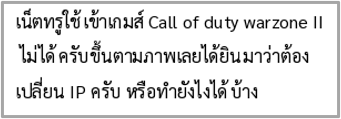
#### **Screenshot type: text with header**
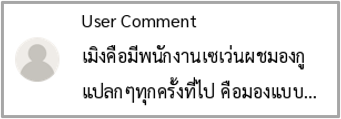
#### **Screenshot type: text with reaction**
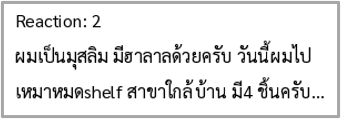

In [ ]:
#@title #***SET UP***

#Install libraries
!pip install python-pptx
!pip install pandas
!pip install colorama
!pip install requests
!pip install pythainlp
!pip install pilmoji
!pip install emoji

#Import necessary libraries
from google.colab import files
from IPython.display import clear_output
from colorama import Fore, Style
import ipywidgets as widgets
import requests
import io
import re
import emoji
import warnings
from PIL import Image, ImageDraw, ImageFont
from pilmoji import Pilmoji
from pilmoji.source import TwemojiEmojiSource
from pythainlp import word_tokenize
import pandas as pd
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN
from pptx.dml.color import RGBColor
pd.set_option("display.max_columns", 50)

# Create function to download font
def download_file(url):
    local_filename = url.split("/")[-1]
    r = requests.get(url)
    with open(local_filename, "wb") as f:
        for chunk in r.iter_content(chunk_size=1024):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)
    return

# Font url
sarabun_font_url = "https://github.com/Theerachod/Font/raw/main/Sarabun-Regular.ttf"
noto_font_url = "https://github.com/Theerachod/Font/raw/main/NotoColorEmoji-Regular.ttf"

# Download font
download_file(sarabun_font_url)
download_file(noto_font_url)

# Create function to get dummy user image
def get_image_url(url):
    r = requests.get(url)
    content = r.content
    image = Image.open(io.BytesIO(content))
    return image

# Get dummy user image
user_image = get_image_url("https://i.ibb.co/cJ20h1S/user.png")
user_image.save("user_image.png", format="PNG")

# Create function to list all existing emoji in message
def get_existing_emojis(message):
    emoji_list = []

    for char in message:
        if emoji.is_emoji(char):
            emoji_list.append(char)

    return emoji_list

# Create function to modify message type to display in screenshot
def modify_type(message_type):
    text = re.sub(r"_", " ", message_type)
    text = text.title()
    return text

def generate_screenshot_text(message):

    # Disabling the DeprecationWarnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        img_width, img_height = 300, 100
        background_color = (255, 255, 255, 0)
        image = Image.new("RGB", (img_width, img_height), background_color)

        # To render emoji
        pilmoji = Pilmoji(image, source=TwemojiEmojiSource)
        # Thai Sarabun font
        thai_font = ImageFont.truetype("/content/Sarabun-Regular.ttf", 16)
        # Emoji font
        emoji_font = ImageFont.truetype("/content/NotoColorEmoji-Regular.ttf", 16)

        # Get existing emoji in the message
        emoji_list = get_existing_emojis(message)
        emoji_set = list(set(emoji_list))

        # Check if there are emojis in message
        if len(emoji_set) == 0:
            split_emoji = [message]
        else:
            # Split emoji
            split_emoji = re.split(r"(" + "|".join(re.escape(e) for e in emoji_set) + r")", message)
            split_emoji = [item for item in split_emoji if item != '']

        # Tokenize message
        result = []
        for item in split_emoji:
            if item.strip() != "":
                # Tokenize non-empty non-emoji items
                tokens = word_tokenize(item)
                result.extend(tokens)
            else:
                result.append(item)

        # Set dumy message to always get the same message height
        dummy_message = "ผมเป็นมุสลิม รู้ว่ามีฮาลาล วันนี้ผมไปเหมาหมดShelfเลย สาขาใกล้บ้าน มีอยู่ 4 ชิ้นครับ"

        # Calculate height
        text_height = thai_font.getsize(dummy_message)[1] + 5

        # Set left and right margin
        margin = 10

        # Calculate available width to draw message
        available_space = img_width - (margin*2)

        # Calculate the message width
        word_width = []

        for word in result:
            if word in emoji_set:
                word_width.append(emoji_font.getsize(word)[0] + 2)
            else:
                word_width.append(thai_font.getsize(word)[0])

        # Calculate total width of message
        total_width = sum(word_width)

        #Identify how many lines there are
        if total_width > available_space * 2:
            line = 3
        elif total_width >available_space:
            line = 2
        else:
            line = 1

        # Calculate number of space between line
        no_space = line + 1

        # Calculate space
        space_between_line = (img_height - text_height*line) / no_space

        # Put text on the imagean and use if to identify the case
        if line ==1:

            # Define x and y position
            x = margin
            y = space_between_line


            for word in result:

                if word in emoji_set:
                    emo = True
                    word_width = emoji_font.getsize(word)[0] + 2

                else:
                    emo = False
                    word_width =  thai_font.getsize(word)[0]

                if emo:
                    try:
                        pilmoji.text((int(x + 2), int(y + 3)), word, font=emoji_font, fill="black")
                        x += word_width
                    except:
                        pass

                else:
                    try:
                        pilmoji.text((int(x), int(y)), word, font=thai_font, fill="black")
                        x += word_width
                    except:
                        pass

        elif line == 2:

            # Initialize to count word number
            word_num = 0

            # Initialize to count width for each line
            line_1_message_width = 0
            line_2_message_width = 0

            # Define x and y position
            x = margin
            y = space_between_line*1.5

            for word in result:

                if word in emoji_set:
                    emo = True
                    word_width = emoji_font.getsize(word)[0] + 2

                else:
                    emo = False
                    word_width =  thai_font.getsize(word)[0]

                line_1_message_width += word_width

                if line_1_message_width < available_space:

                    if emo:
                        try:
                            pilmoji.text((int(x + 2), int(y + 3)), word, font=emoji_font, fill="black")
                            x += word_width
                            word_num += 1
                        except:
                            pass

                    else:
                        try:
                            pilmoji.text((int(x), int(y)), word, font=thai_font, fill="black")
                            x += word_width
                            word_num += 1
                        except:
                            pass

                else:
                    break

            # Define x and y position
            x = margin
            y = text_height + space_between_line*2

            for word in result[word_num:]:

                if word in emoji_set:
                    emo = True
                    word_width = emoji_font.getsize(word)[0] + 2

                else:
                    emo = False
                    word_width =  thai_font.getsize(word)[0]

                line_2_message_width += word_width

                if line_2_message_width < available_space:

                    if emo:
                        try:
                            pilmoji.text((int(x + 2), int(y + 3)), word, font=emoji_font, fill="black")
                            x += word_width
                            word_num += 1
                        except:
                            pass

                    else:
                        try:
                            pilmoji.text((int(x), int(y)), word, font=thai_font, fill="black")
                            x += word_width
                            word_num += 1
                        except:
                            pass

                else:
                    break
        else:

            # Initialize to count word number
            word_num = 0

            # Initialize to count width for each line
            line_1_message_width = 0
            line_2_message_width = 0
            line_3_message_width = 0

            # Define x and y position
            x = margin
            y = space_between_line*1.5

            for word in result:

                if word in emoji_set:
                    emo = True
                    word_width = emoji_font.getsize(word)[0] + 2

                else:
                    emo = False
                    word_width =  thai_font.getsize(word)[0]

                line_1_message_width += word_width

                if line_1_message_width < available_space:

                    if emo:
                        try:
                            pilmoji.text((int(x + 2), int(y + 3)), word, font=emoji_font, fill="black")
                            x += word_width
                            word_num += 1
                        except:
                            pass

                    else:
                        try:
                            pilmoji.text((int(x), int(y)), word, font=thai_font, fill="black")
                            x += word_width
                            word_num += 1
                        except:
                            pass

                else:
                    break

            # Define x and y position
            x = margin
            y = text_height + space_between_line*2

            for word in result[word_num:]:

                if word in emoji_set:
                    emo = True
                    word_width = emoji_font.getsize(word)[0] + 2

                else:
                    emo = False
                    word_width =  thai_font.getsize(word)[0]

                line_2_message_width += word_width

                if line_2_message_width < available_space:

                    if emo:
                        try:
                            pilmoji.text((int(x + 2), int(y + 3)), word, font=emoji_font, fill="black")
                            x += word_width
                            word_num += 1
                        except:
                            pass

                    else:
                        try:
                            pilmoji.text((int(x), int(y)), word, font=thai_font, fill="black")
                            x += word_width
                            word_num += 1
                        except:
                            pass

                else:
                    break

            # Define x and y position
            x = margin
            y = text_height*2 + space_between_line*3

            for word in result[word_num:]:

                if word in emoji_set:
                    emo = True
                    word_width = emoji_font.getsize(word)[0] + 2

                else:
                    emo = False
                    word_width =  thai_font.getsize(word)[0]

                line_3_message_width += word_width

                if line_3_message_width < (available_space - 10):

                    if emo:
                        try:
                            pilmoji.text((int(x + 2), int(y + 3)), word, font=emoji_font, fill="black")
                            x += word_width
                            word_num += 1
                        except:
                            pass

                    else:
                        try:
                            pilmoji.text((int(x), int(y)), word, font=thai_font, fill="black")
                            x += word_width
                            word_num += 1
                        except:
                            pass

                else:
                    pilmoji.text((x, y), "...", font=thai_font, fill="black")
                    break

    return image

def generate_screenshot_header(message, header):

    # Disabling the DeprecationWarnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        img_width, img_height = 300, 100
        background_color = (255, 255, 255, 0)
        image = Image.new("RGB", (img_width, img_height), background_color)

        # Open the image you want to paste onto the chart
        image_to_paste = Image.open("/content/user_image.png")

        # Resize the image to fit the desired size
        desired_width, desired_height = 40, 40
        image_to_paste = image_to_paste.resize((desired_width, desired_height))

        # Define the position where you want to paste the image
        x_position = 10
        y_position = (img_height - desired_height) // 2
        paste_position = (x_position, y_position)

        # Paste the resized image onto the chart at the specified position
        image.paste(image_to_paste, paste_position, image_to_paste)

        # To render emoji
        pilmoji = Pilmoji(image, source=TwemojiEmojiSource)
        # Thai Sarabun font
        thai_font = ImageFont.truetype("/content/Sarabun-Regular.ttf", 16)
        # Emoji font
        emoji_font = ImageFont.truetype("/content/NotoColorEmoji-Regular.ttf", 16)

        # Get existing emoji in the message
        emoji_list = get_existing_emojis(message)
        emoji_set = list(set(emoji_list))

        # Check if there are emojis in message
        if len(emoji_set) == 0:
            split_emoji = [message]
        else:
            # Split emoji
            split_emoji = re.split(r"(" + "|".join(re.escape(e) for e in emoji_set) + r")", message)
            split_emoji = [item for item in split_emoji if item != '']

        # Tokenize message
        result = []
        for item in split_emoji:
            if item.strip() != "":
                # Tokenize non-empty non-emoji items
                tokens = word_tokenize(item)
                result.extend(tokens)
            else:
                result.append(item)

        # Define position x and margin
        start_x = 70
        margin = 10

        # Set dumy message to always get the same message height
        dummy_message = "ผมเป็นมุสลิม รู้ว่ามีฮาลาล วันนี้ผมไปเหมาหมดShelfเลย สาขาใกล้บ้าน มีอยู่ 4 ชิ้นครับ"

        # Calculate height
        text_height = thai_font.getsize(dummy_message)[1] + 5


        # Calculate available width to draw message
        available_space = img_width - start_x - margin

        # Calculate the message width
        word_width = []

        for word in result:
            if word in emoji_set:
                word_width.append(emoji_font.getsize(word)[0] + 2)
            else:
                word_width.append(thai_font.getsize(word)[0])

        # Calculate total width of message
        total_width = sum(word_width)

        #Identify how many lines there are
        if total_width > available_space:
            line = 2
        else:
            line = 1

        # Calculate actual number of line (plus reaction display)
        actual_line = line + 1

        # Calculate number of space between line
        no_space = actual_line + 1

        # Calculate space
        space_between_line = (img_height - text_height*actual_line) / no_space

        # Define y position
        y = space_between_line*1.5

        # Display reaction
        pilmoji.text((int(start_x), int(y)), f"{header}", font=thai_font, fill="black")

        # Put text on the imagean and use if to identify the case
        if line ==1:

            # Define x and y position
            x = start_x
            y = text_height + space_between_line*2


            for word in result:

                if word in emoji_set:
                    emo = True
                    word_width = emoji_font.getsize(word)[0] + 2

                else:
                    emo = False
                    word_width =  thai_font.getsize(word)[0]

                if emo:
                    try:
                        pilmoji.text((int(x + 2), int(y + 3)), word, font=emoji_font, fill="black")
                        x += word_width
                    except:
                        pass

                else:
                    try:
                        pilmoji.text((int(x), int(y)), word, font=thai_font, fill="black")
                        x += word_width
                    except:
                        pass

        else:
            # Initialize to count word number
            word_num = 0

            # Initialize to count width for each line
            line_1_message_width = 0
            line_2_message_width = 0

            # Define x and y position
            x = start_x
            y = text_height + space_between_line*2

            for word in result:

                if word in emoji_set:
                    emo = True
                    word_width = emoji_font.getsize(word)[0] + 2

                else:
                    emo = False
                    word_width =  thai_font.getsize(word)[0]

                line_1_message_width += word_width

                if line_1_message_width < available_space:

                    if emo:
                        try:
                            pilmoji.text((int(x + 2), int(y + 3)), word, font=emoji_font, fill="black")
                            x += word_width
                            word_num += 1
                        except:
                            pass

                    else:
                        try:
                            pilmoji.text((int(x), int(y)), word, font=thai_font, fill="black")
                            x += word_width
                            word_num += 1
                        except:
                            pass

                else:
                    break

            # Define x and y position
            x = start_x
            y = text_height*2 + space_between_line*3

            for word in result[word_num:]:

                if word in emoji_set:
                    emo = True
                    word_width = emoji_font.getsize(word)[0] + 2

                else:
                    emo = False
                    word_width =  thai_font.getsize(word)[0]

                line_2_message_width += word_width

                if line_2_message_width < (available_space - 10):

                    if emo:
                        try:
                            pilmoji.text((int(x + 2), int(y + 3)), word, font=emoji_font, fill="black")
                            x += word_width
                            word_num += 1
                        except:
                            pass

                    else:
                        try:
                            pilmoji.text((int(x), int(y)), word, font=thai_font, fill="black")
                            x += word_width
                            word_num += 1
                        except:
                            pass

                else:
                    pilmoji.text((x, y), "...", font=thai_font, fill="black")
                    break

    return image

def generate_screenshot_reaction(message, reaction):

    # Disabling the DeprecationWarnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        img_width, img_height = 300, 100
        background_color = (255, 255, 255, 0)
        image = Image.new("RGB", (img_width, img_height), background_color)

        # To render emoji
        pilmoji = Pilmoji(image, source=TwemojiEmojiSource)
        # Thai Sarabun font
        thai_font = ImageFont.truetype("/content/Sarabun-Regular.ttf", 16)
        # Emoji font
        emoji_font = ImageFont.truetype("/content/NotoColorEmoji-Regular.ttf", 16)

        # Get existing emoji in the message
        emoji_list = get_existing_emojis(message)
        emoji_set = list(set(emoji_list))

        # Check if there are emojis in message
        if len(emoji_set) == 0:
            split_emoji = [message]
        else:
            # Split emoji
            split_emoji = re.split(r"(" + "|".join(re.escape(e) for e in emoji_set) + r")", message)
            split_emoji = [item for item in split_emoji if item != '']

        # Tokenize message
        result = []
        for item in split_emoji:
            if item.strip() != "":
                # Tokenize non-empty non-emoji items
                tokens = word_tokenize(item)
                result.extend(tokens)
            else:
                result.append(item)

        # Set dumy message to always get the same message height
        dummy_message = "ผมเป็นมุสลิม รู้ว่ามีฮาลาล วันนี้ผมไปเหมาหมดShelfเลย สาขาใกล้บ้าน มีอยู่ 4 ชิ้นครับ"

        # Calculate height
        text_height = thai_font.getsize(dummy_message)[1] + 5

        # Set left and right margin
        margin = 10

        # Calculate available width to draw message
        available_space = img_width - (margin*2)

        # Calculate the message width
        word_width = []

        for word in result:
            if word in emoji_set:
                word_width.append(emoji_font.getsize(word)[0] + 2)
            else:
                word_width.append(thai_font.getsize(word)[0])

        # Calculate total width of message
        total_width = sum(word_width)

        #Identify how many lines there are
        if total_width > available_space:
            line = 2
        else:
            line = 1

        # Calculate actual number of line (plus reaction display)
        actual_line = line + 1

        # Calculate number of space between line
        no_space = actual_line + 1

        # Calculate space
        space_between_line = (img_height - text_height*actual_line) / no_space

        # Define x and y position
        x = margin
        y = space_between_line*1.5

        # Display reaction
        pilmoji.text((int(x), int(y)), f"Reaction: {reaction}", font=thai_font, fill="black")

        # Put text on the imagean and use if to identify the case
        if line ==1:

            # Define x and y position
            x = margin
            y = text_height + space_between_line*2


            for word in result:

                if word in emoji_set:
                    emo = True
                    word_width = emoji_font.getsize(word)[0] + 2

                else:
                    emo = False
                    word_width =  thai_font.getsize(word)[0]

                if emo:
                    try:
                        pilmoji.text((int(x + 2), int(y + 3)), word, font=emoji_font, fill="black")
                        x += word_width
                    except:
                        pass

                else:
                    try:
                        pilmoji.text((int(x), int(y)), word, font=thai_font, fill="black")
                        x += word_width
                    except:
                        pass

        else:
            # Initialize to count word number
            word_num = 0

            # Initialize to count width for each line
            line_1_message_width = 0
            line_2_message_width = 0

            # Define x and y position
            x = margin
            y = text_height + space_between_line*2

            for word in result:

                if word in emoji_set:
                    emo = True
                    word_width = emoji_font.getsize(word)[0] + 2

                else:
                    emo = False
                    word_width =  thai_font.getsize(word)[0]

                line_1_message_width += word_width

                if line_1_message_width < available_space:

                    if emo:
                        try:
                            pilmoji.text((int(x + 2), int(y + 3)), word, font=emoji_font, fill="black")
                            x += word_width
                            word_num += 1
                        except:
                            pass

                    else:
                        try:
                            pilmoji.text((int(x), int(y)), word, font=thai_font, fill="black")
                            x += word_width
                            word_num += 1
                        except:
                            pass

                else:
                    break

            #  Define x and y position
            x = margin
            y = text_height*2 + space_between_line*3

            for word in result[word_num:]:

                if word in emoji_set:
                    emo = True
                    word_width = emoji_font.getsize(word)[0] + 2

                else:
                    emo = False
                    word_width =  thai_font.getsize(word)[0]

                line_2_message_width += word_width

                if line_2_message_width < (available_space - 10):

                    if emo:
                        try:
                            pilmoji.text((int(x + 2), int(y + 3)), word, font=emoji_font, fill="black")
                            x += word_width
                            word_num += 1
                        except:
                            pass

                    else:
                        try:
                            pilmoji.text((int(x), int(y)), word, font=thai_font, fill="black")
                            x += word_width
                            word_num += 1
                        except:
                            pass

                else:
                    pilmoji.text((x, y), "...", font=thai_font, fill="black")
                    break

    return image

# Define function to create PowerPoint with screenshots
def create_PowerPoint(data, title, file_name, highlight_category=False, hex_color_dict=None):

    # Define counter
    page_counter = 1
    images_per_slide = 21
    image_counter = 0
    category_list = list()

    # Create PowerPoint slide
    presentation = Presentation()
    title_page = presentation.slides.add_slide(presentation.slide_layouts[0])
    slide = presentation.slides.add_slide(presentation.slide_layouts[page_counter])

    # Delete title and subtitle of title page
    for shape in title_page.shapes:
        if shape.has_text_frame:
            if shape.placeholder_format.idx == 1:  #Subtitle placeholder
                title_page.shapes._spTree.remove(shape._element)

    # Delete all text boxes of slide
    for shape in slide.shapes:
        if shape.has_text_frame:
            sp = shape._element
            sp.getparent().remove(sp)

    # Put selected columns and value on title_page
    title_text_box = title_page.shapes.title
    title_text_box.text = f"selected columns and values = {title}"

    # Adjusting font size and alignment
    text_frame = title_text_box.text_frame
    text_frame.word_wrap = True
    p = text_frame.paragraphs[0]
    p.alignment = PP_ALIGN.CENTER  # Align text to the center
    run = p.runs[0]
    run.font.size = Pt(16)  # Adjust font size as desired
    run.font.name = "Sarabun" # Adjust font size as desired

    # Define the coordinates and size of the image
    left = Inches(0.25)
    top = Inches(0.2)
    width = Inches(3)
    height = Inches(1)

    for index, row in data.iterrows():
        message = row["Message"]
        url = row["URL"]
        reaction = row["Reaction"]
        header = row["Header"]
        category = row["Category"]

        if type_screenshot == "only text":
            # Create image and draw message
            image = generate_screenshot_text(message)
            image.save(f"message_number_{index}.png", dpi=(300, 300))

        elif type_screenshot == "text with header":
            # Create image and draw message
            image = generate_screenshot_header(message, header)
            image.save(f"message_number_{index}.png", dpi=(300, 300))

        elif type_screenshot == "text with reaction":
            # Create image and draw message
            image = generate_screenshot_reaction(message, reaction)
            image.save(f"message_number_{index}.png", dpi=(300, 300))

        if image_counter < images_per_slide:
            if top + height <= Inches(7.5):  # Check if the current position is within the slide's height
                if category not in category_list:
                    category_list.append(category)
                    slide.shapes.add_picture(f"message_number_{index}.png", left, top, width, height) # Add the image to the slide
                    image_shape = slide.shapes[-1] # Get the image shape object
                    hyperlink_address = url # URL link
                    image_shape.click_action.hyperlink.address = hyperlink_address # Add hyperlink to image
                    outline = image_shape.line
                    outline.width = Pt(3/4)
                    if highlight_category:
                        try:
                            outline.color.rgb = RGBColor.from_string(hex_color_dict[category])
                        except:
                            pass
                    else:
                        pass
                    if category:
                        # Add a textbox to the slide
                        textbox = slide.shapes.add_textbox(left, top, width, height)
                        # Access the text frame of the textbox
                        text_frame = textbox.text_frame
                        # Add a paragraph to the text frame
                        paragraph = text_frame.add_paragraph()
                        # Add a run (text) to the paragraph
                        run = paragraph.add_run()
                        run.text = category
                        # Set the text size
                        run.font.size = Pt(32)
                        textbox.zorder = 1
                    else:
                        pass
                    if highlight_category:
                        try:
                            # Set the text color
                            run.font.color.rgb = RGBColor.from_string(hex_color_dict[category])
                        except:
                            pass
                    else:
                        pass
                    top += Inches(1) # Adjust the vertical position for the next text box
                    image_counter += 1  # Increment the image counter
                else:
                    slide.shapes.add_picture(f"message_number_{index}.png", left, top, width, height) # Add the image to the slide
                    image_shape = slide.shapes[-1] # Get the image shape object
                    hyperlink_address = url # URL link
                    image_shape.click_action.hyperlink.address = hyperlink_address # Add hyperlink to image
                    outline = image_shape.line
                    outline.width = Pt(3/4)
                    if highlight_category:
                        try:
                            outline.color.rgb = RGBColor.from_string(hex_color_dict[category])
                        except:
                            pass
                    else:
                        pass
                    top += Inches(1) # Adjust the vertical position for the next text box
                    image_counter += 1  # Increment the image counter
            else:
                top = Inches(0.2)  # Reset the top position
                left += Inches(3.25)  # Adjust the left position
                if category not in category_list:
                    category_list.append(category)
                    slide.shapes.add_picture(f"message_number_{index}.png", left, top, width, height) # Add the image to the slide
                    image_shape = slide.shapes[-1] # Get the image shape object
                    hyperlink_address = url # URL link
                    image_shape.click_action.hyperlink.address = hyperlink_address # Add hyperlink to image
                    outline = image_shape.line
                    outline.width = Pt(3/4)
                    if highlight_category:
                        try:
                            outline.color.rgb = RGBColor.from_string(hex_color_dict[category])
                        except:
                            pass
                    else:
                        pass
                    if category:
                        # Add a textbox to the slide
                        textbox = slide.shapes.add_textbox(left, top, width, height)
                        # Access the text frame of the textbox
                        text_frame = textbox.text_frame
                        # Add a paragraph to the text frame
                        paragraph = text_frame.add_paragraph()
                        # Add a run (text) to the paragraph
                        run = paragraph.add_run()
                        run.text = category
                        # Set the text size
                        run.font.size = Pt(32)
                        textbox.zorder = 1
                    else:
                        pass
                    if highlight_category:
                        try:
                            # Set the text color
                            run.font.color.rgb = RGBColor.from_string(hex_color_dict[category])
                        except:
                            pass
                    else:
                        pass
                    top += Inches(1) # Adjust the vertical position for the next text box
                    image_counter += 1  # Increment the image counter
                else:
                    slide.shapes.add_picture(f"message_number_{index}.png", left, top, width, height) # Add the image to the slide
                    image_shape = slide.shapes[-1] # Get the image shape object
                    hyperlink_address = url # URL link
                    image_shape.click_action.hyperlink.address = hyperlink_address # Add hyperlink to image
                    outline = image_shape.line
                    outline.width = Pt(3/4)
                    if highlight_category:
                        try:
                            outline.color.rgb = RGBColor.from_string(hex_color_dict[category])
                        except:
                            pass
                    else:
                        pass
                    top += Inches(1) # Adjust the vertical position for the next text box
                    image_counter += 1  # Increment the image counter
        else:
            # Create a new slide
            page_counter+= 1
            slide = presentation.slides.add_slide(presentation.slide_layouts[page_counter])
            # Delete title and subtitle boxes
            for shape in slide.shapes:
                if shape.has_text_frame:
                    sp = shape._element
                    sp.getparent().remove(sp)
            image_counter = 0  # Reset the image counter
            left = Inches(0.25)  # Reset the left position
            top = Inches(0.2)   # Reset the top position
            if category not in category_list:
                category_list.append(category)
                slide.shapes.add_picture(f"message_number_{index}.png", left, top, width, height) # Add the image to the slide
                image_shape = slide.shapes[-1] # Get the image shape object
                hyperlink_address = url # URL link
                image_shape.click_action.hyperlink.address = hyperlink_address # Add hyperlink to image
                outline = image_shape.line
                outline.width = Pt(3/4)
                if highlight_category:
                    try:
                        outline.color.rgb = RGBColor.from_string(hex_color_dict[category])
                    except:
                        pass
                else:
                    pass
                if category:
                    # Add a textbox to the slide
                    textbox = slide.shapes.add_textbox(left, top, width, height)
                    # Access the text frame of the textbox
                    text_frame = textbox.text_frame
                    # Add a paragraph to the text frame
                    paragraph = text_frame.add_paragraph()
                    # Add a run (text) to the paragraph
                    run = paragraph.add_run()
                    run.text = category
                    # Set the text size
                    run.font.size = Pt(32)
                    textbox.zorder = 1
                else:
                    pass
                if highlight_category:
                    try:
                        # Set the text color
                        run.font.color.rgb = RGBColor.from_string(hex_color_dict[category])
                    except:
                        pass
                else:
                    pass
                top += Inches(1) # Adjust the vertical position for the next text box
                image_counter += 1  # Increment the image counter
            else:
                slide.shapes.add_picture(f"message_number_{index}.png", left, top, width, height) # Add the image to the slide
                image_shape = slide.shapes[-1] # Get the image shape object
                hyperlink_address = url # URL link
                image_shape.click_action.hyperlink.address = hyperlink_address # Add hyperlink to image
                outline = image_shape.line
                outline.width = Pt(3/4)
                if highlight_category:
                    try:
                        outline.color.rgb = RGBColor.from_string(hex_color_dict[category])
                    except:
                        pass
                else:
                    pass
                top += Inches(1) # Adjust the vertical position for the next text box
                image_counter += 1  # Increment the image counter

    presentation.save(f"result_{uploaded_file_name}.pptx")

#Print result
clear_output()
print(Fore.GREEN + "[Success] All necessary dependencies has been installed")

[Success] All necessary dependencies has been installed


In [ ]:
#@title #***Step 1: Import data file*** {display-mode: "form"}

#@markdown **Note:** Support only excel file.

#upload data from local computer
try:
    data_file = files.upload()
    clear_output()
    print(Fore.GREEN + "[Success] Raw data uploaded")
except Exception as error:
    clear_output()
    print(Fore.RED + "[Error] Cannot upload file, Please try again.")

[Success] Raw data uploaded


#**Step 2: Select sheet and columns to use for generating screenshot**

In [ ]:
#@markdown Press **"Run"** and **select** sheet name

# Create an ExcelFile object
excel_file = pd.ExcelFile(list(data_file.keys())[0])

# Get the list of sheet names
sheet_names = excel_file.sheet_names

# Create a dropdown widget for selecting the sheet name
dropdown_sheet = widgets.Dropdown(
    options=sheet_names,
    description="Select Sheet:"
)



# Define a function to handle the sheet name selection event
def handle_sheet_selection(change):
    selected_sheet = change.new

    # Read the selected sheet as a DataFrame
    df = pd.read_excel(list(data_file.keys())[0], sheet_name=selected_sheet)

# Attach the sheet selection event handler
dropdown_sheet.observe(handle_sheet_selection, names="value")

# Display the dropdown widgets with spacing
display(dropdown_sheet)

Dropdown(description='Select Sheet:', options=('Sheet1',), value='Sheet1')

In [ ]:
#@markdown ##### **Select version of screenshot and Run this cell**
type_screenshot = "text with header" # @param ["only text", "text with header", "text with reaction"]

In [ ]:
#@markdown ##### **Press "Run" to select required columns**

# Define a function to handle the column selection event
def handle_column_selection(change):
    selected_column = change.new

# Read raw data
df = pd.read_excel(list(data_file.keys())[0],sheet_name=dropdown_sheet.value)

# Set date column as string
df_col = df.columns.to_list()
date_col = [item for item in df_col if "Date" in item or "date" in item or "DATE" in item]
for col in date_col:
    df[col] = df[col].astype(str)

# Clean null value
category_columns = df.select_dtypes("object").columns.to_list() #List object columns
numerical_columns = df.select_dtypes("number").columns.to_list() #List numerical columns
df[category_columns] = df[category_columns].fillna('-') #Fill null value in object columns
df[numerical_columns] = df[numerical_columns].fillna(0) #Fill null value in numerical columns

# Handle screenshot type
if type_screenshot == "only text":
    dropdown_message = widgets.Dropdown(description="Message:", options=df.columns.tolist())
    dropdown_url = widgets.Dropdown(description="URL:", options=df.columns.tolist())
    dropdown_type = widgets.Dropdown(description="Type:", options=df.columns.tolist())
    dropdown_category = widgets.Dropdown(description="Category:", options=[None] + df.columns.tolist())

    # Attach the column selection event handler
    dropdown_message.observe(handle_column_selection, names="value")
    dropdown_url.observe(handle_column_selection, names="value")
    dropdown_type.observe(handle_column_selection, names="value")
    dropdown_category.observe(handle_column_selection, names="value")

    # Create an VBox layout container to add margins and space between the dropdowns
    vbox = widgets.VBox([dropdown_message, dropdown_url, dropdown_type, dropdown_category], layout=widgets.Layout(margin="0 0 05px 0"))



elif type_screenshot == "text with header":
    dropdown_message = widgets.Dropdown(description="Message:", options=df.columns.tolist())
    dropdown_url = widgets.Dropdown(description="URL:", options=df.columns.tolist())
    dropdown_type = widgets.Dropdown(description="Type:", options=df.columns.tolist())
    dropdown_header = widgets.Dropdown(description="Header:", options=df.columns.tolist())
    dropdown_category = widgets.Dropdown(description="Category:", options=[None] + df.columns.tolist())

    # Attach the column selection event handler
    dropdown_message.observe(handle_column_selection, names="value")
    dropdown_url.observe(handle_column_selection, names="value")
    dropdown_type.observe(handle_column_selection, names="value")
    dropdown_header.observe(handle_column_selection, names="value")
    dropdown_category.observe(handle_column_selection, names="value")

    # Create an VBox layout container to add margins and space between the dropdowns
    vbox = widgets.VBox([dropdown_message, dropdown_url, dropdown_type, dropdown_header, dropdown_category], layout=widgets.Layout(margin="0 0 05px 0"))


elif type_screenshot == "text with reaction":
    dropdown_message = widgets.Dropdown(description="Message:", options=df.columns.tolist())
    dropdown_url = widgets.Dropdown(description="URL:", options=df.columns.tolist())
    dropdown_type = widgets.Dropdown(description="Type:", options=df.columns.tolist())
    dropdown_reaction = widgets.Dropdown(description="Reaction:", options=df.columns.tolist())
    dropdown_category = widgets.Dropdown(description="Category:", options=[None] + df.columns.tolist())

    # Attach the column selection event handler
    dropdown_message.observe(handle_column_selection, names="value")
    dropdown_url.observe(handle_column_selection, names="value")
    dropdown_type.observe(handle_column_selection, names="value")
    dropdown_reaction.observe(handle_column_selection, names="value")
    dropdown_category.observe(handle_column_selection, names="value")

    # Create an VBox layout container to add margins and space between the dropdowns
    vbox = widgets.VBox([dropdown_message, dropdown_url, dropdown_type, dropdown_reaction, dropdown_category], layout=widgets.Layout(margin="0 0 05px 0"))

# Display the dropdown widgets in a column
display(vbox)

#**Step 3: Apply default and user's filter**

In [ ]:
#@markdown ##### **Apply default filter**

print("Apply default filter: excluding blank message and message from page\n")
print("\033[1m" + "Number of rows before apply filter: " + f"{format(len(df), ',')}\n" + "\033[0m")
# Null values of object columns is replace with "-" in step 3 then replace "-" in message column with "No Message"
df[dropdown_message.value] = df[dropdown_message.value].replace({"-":"No Message"})

# Create variable to filter data with "No Message"
no_message = df[dropdown_message.value] == "No Message"

# Exclude blank message
apply_default_filter_df = df[~no_message]

# Create variable to filter data which type contains "page"
page_message = apply_default_filter_df[dropdown_type.value].str.contains("page")

# Exclude message from page
apply_default_filter_df = apply_default_filter_df[~apply_default_filter_df[dropdown_type.value].str.contains("page")]

print("\033[1m" + "Number of rows after apply filter: " +  f"{format(len(apply_default_filter_df), ',')}\n" + "\033[0m")


Apply default filter: excluding blank message and message from page

Number of rows before apply filter: 42

Number of rows after apply filter: 40



In [ ]:
#@markdown Press **"Run"**, set criterias to filter data, and click **"Filter"** button

# List of column names
#column_names = apply_default_filter_df.columns.tolist()

# Create dropdown lists for columns and values
column_dropdowns = []
value_dropdowns = []

# Change the number of dropdown lists here
x = 8

for i in range(x):
    # Dropdown list for selecting column
    column_dropdown = widgets.Dropdown(options=[None] + apply_default_filter_df.columns.tolist(), description=f"Column {i+1}:")
    column_dropdown.layout.margin = "0 20px 0 0"  # Add right margin for spacing
    column_dropdowns.append(column_dropdown)

    # Dropdown list for selecting value/category within the selected column
    value_dropdown = widgets.SelectMultiple(description=f"Values {i+1}:", options=[], disabled=True)
    value_dropdowns.append(value_dropdown)

    def value_dropdown(change, index=i):
        column = change.new
        value_dropdown = value_dropdowns[index]

        if column:
            column_type = apply_default_filter_df[column].dtype
            values = sorted(apply_default_filter_df[column].unique().tolist())

            if pd.api.types.is_numeric_dtype(column_type):
                value_dropdown.options = [(None, None)] + [(v, v) for v in values]
            else:
                value_dropdown.options = [(None, None)] + [(v, str(v)) for v in values]

            value_dropdown.disabled = False
        else:
            value_dropdown.options = []
            value_dropdown.disabled = True

    column_dropdown.observe(value_dropdown, "value")

# Button to trigger the filtering
button = widgets.Button(description="Filter")

def filter_dataframe(*args):
    # Declare filtered_df as a global variable
    global filtered_df

    filtered_df = apply_default_filter_df.copy()

    for i in range(x):
        column = column_dropdowns[i].value
        value = value_dropdowns[i].value

        if column and value:
            filtered_df = filtered_df[filtered_df[column].isin(value)]

    # Reset index
    filtered_df = filtered_df.reset_index(drop=True)

    with pd.option_context("display.max_rows", 2):
        display(filtered_df)
        print("\033[1m" + f"\nNumber of rows: {format(len(filtered_df), ',')}" + "\033[0m")


button.on_click(filter_dataframe)

# Create VBox widgets to stack the dropdown lists vertically
column_boxes = []

for i in range(x):
    column_box = widgets.HBox([column_dropdowns[i], value_dropdowns[i]])
    column_box.layout.margin = "0 0 5px 0"  # Add bottom margin for spacing
    column_boxes.append(column_box)

# Display the dropdown lists and filter button
display(*column_boxes, button)

Button(description='Filter', style=ButtonStyle())

id  Account            Post Date Post Time  \
0   23Nov06515  UNKNOWN  2023-11-02 07:00:00  20:08:32   
..         ...      ...                  ...       ...   
39  23Nov09554  UNKNOWN  2023-11-03 07:00:00  11:26:31   

                                              Message                Type  \
0                        มีโปรโมชั่นตัวไหนน่าสนใจบ้าง        user_comment   
..                                                ...                 ...   
39  ที่ซุกหัวนอน แต่คิดอีกทีออริจิ้นอาจจะเหมาะทำโร...  user_reply_comment   

   Post Type                                Direct URL  \
0          -  https://www.facebook.com/263899439491135   
..       ...                                       ...   
39         -  https://www.facebook.com/883860403135379   

                                    Post URL        Source   Channel  \
0   https://www.facebook.com/670295578649493     Sale Here  facebook   
..                                       ...           ...       ...   
39  https://www.facebook.com/321861897219760  ที่ซุกหัวนอน  facebook   

    Reaction  Comment  Share  Engagement  Views  Follower Count  \
0          0        0      0           0      0         7042686   
..       ...      ...    ...         ...    ...             ...   
39         1        0      0           1      0           21814   

      Main Keyword Sub Keyword Track Account Track Post           Page ID  \
0                -           -  Not specific        Yes   638668092887973   
..             ...         ...           ...        ...               ...   
39  ออริจิ้น+คอนโด           -  Not Specific          -  1802719063309096   

     Media   note   Brand       Product Category Sub-Category Sentiment  \
0   Earned  Condo  Ananda  Not specific    Price    Promotion   Enquiry   
..     ...    ...     ...           ...      ...          ...       ...   
39  Earned  Condo  Origin  Not Specific  Quality      Quality  Negative   

    weight status  
0        1      -  
..     ...    ...  
39       1      -  

[40 rows x 31 columns]


Number of rows: 40


#**Step 4:  Enter number to generate screenshot**



In [ ]:
#@markdown ##### **Enter number of messages to generate (maximum number: 210)**

# Set number of mesage to generate
number_of_messages = 45 #@param {type:"number"}

# Always generate random result when sampling
random = True # @param {type:"boolean"}

# Check number of messages
if number_of_messages >= 0 :
    pass
elif number_of_messages < 0:
    raise ValueError(Fore.RED+"Input must be equal or more than 0")

# Check numbef of message if excceds the number of row in for_sampling
if number_of_messages <= filtered_df.shape[0]:
    pass
elif number_of_messages > filtered_df.shape[0]:
    number_of_messages =  filtered_df.shape[0]

# Check if number of messages exceed the limit of 480
if number_of_messages < 210:
    pass
elif number_of_messages > 210:
    number_of_messages = 210

# Check if user wants to generate random result or not
if random:
    seed = None
else:
    seed = 123

# Sampling message
if number_of_messages == filtered_df.shape[0]:
    messages_to_generate = filtered_df
elif number_of_messages < filtered_df.shape[0]:
    messages_to_generate = filtered_df.sample(number_of_messages, random_state=seed, ignore_index=True)

with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        # Create dataframe
        if type_screenshot == "only text":
            to_pp = messages_to_generate[[dropdown_message.value, dropdown_url.value]]
            to_pp.columns = ["Message", "URL"]
            to_pp["Reaction"] = None
            to_pp["Header"] = None
            to_pp = to_pp.reset_index(drop=True)

        elif type_screenshot == "text with header":
            to_pp = messages_to_generate[[dropdown_message.value, dropdown_url.value]]
            to_pp.columns = ["Message", "URL"]
            to_pp["Reaction"] = None
            to_pp["Header"] = messages_to_generate[dropdown_header.value]
            to_pp["Header"] = to_pp["Header"].apply(modify_type)
            to_pp = to_pp.reset_index(drop=True)

        elif type_screenshot == "text with reaction":
            to_pp = messages_to_generate[[dropdown_message.value, dropdown_url.value]]
            to_pp.columns = ["Message", "URL"]
            to_pp["Reaction"] = messages_to_generate[dropdown_reaction.value]
            to_pp["Header"] = None
            to_pp = to_pp.reset_index(drop=True)

        if dropdown_category.value:
            to_pp["Category"] = messages_to_generate[dropdown_category.value]
            to_pp = to_pp.sort_values(by="Category", ascending=True)

        else:
            to_pp["Category"] = None

# Display message
with pd.option_context("display.max_rows", None):
    to_pp = to_pp.reset_index(drop=True)
    display(to_pp)
    print("\033[1m"+ f"\nNumber of rows: {format(len(to_pp), ',')}" + "\033[0m")

Message  \
0                        มีโปรโมชั่นตัวไหนน่าสนใจบ้าง   
1                   Pawanrat Satitayuth ส่วนลดเยอะมาก   
2                           นิชานาถ เลิศวิลัยย ลดเยอะ   
3   -Location ดีถึงขั้น rare  -Room type ธรรมดา -C...   
4   ก็ปล่อยเช่าดีนะ ขายต่อก็ดี ไม่ขาดทุน ห้องเช่า ...   
5   ถ้าแบ่งคะแนนโลเคชั่น 10/10  ส่วนเรื่องอื่นๆผมว...   
6                                    น่าสนใจทุกอันเลย   
7                                          สนใจเลยค่ะ   
8                                             โปรจุกๆ   
9                                        เยี่ยมมากจ้า   
10                                              น่าสน   
11                                          สุดยอดค่ะ   
12                                         น่าอยู่มาก   
13                                            สวยค่าา   
14                              โครงการน่าอยู่มากครับ   
15                                          วิวสวยจัง   
16                                 วิวอย่างสวยเลยครับ   
17                                       วิวสวยมากค่ะ   
18                     ทำเลโครงการส่วนใหญ่น่าสนใจครับ   
19  -Location ดีถึงขั้น rare  -Room type ธรรมดา -C...   
20  ชอบ Sky Facility และวิวครับ สวนลุม และเพลินจิต...   
21  เยอะคะแถวคอนโด ไอดีโอ จอดเหมือนบ้านตัวเอง ช่วย...   
22  นี่ตรงทางโค้งสี่แยกสุทธิสาร ลอดใต้สะพานรถก็จอด...   
23  ข้อเสียเดียวของซอยนี้ รถนายญี่ปุ่นจอดกันเละเทะ...   
24  Ashton Chula-Silom  Location เทพ ทดแทนได้ยาก -...   
25  แต่คุณภาพ แย่นะคับ ไม่สมกับ ราคา 200000+ per s...   
26                             สระว่ายน้ำปังมากค่ะ ??   
27                                     สระคือปังมากกก   
28  Ashton Chula-Silom  Location เทพ ทดแทนได้ยาก -...   
29  ผมชอบทำเลใกล้รถไฟฟ้า เขาหาที่ดินเก่ง และนิติดู...   
30                     ห่างจากสถานีรถไฟฟ้ากี่เมตรครับ   
31    กี่เมตรไม่รู้นะ แต่ขอแบบ aspire erawan prime ??   
32  ผมชอบทำเลใกล้รถไฟฟ้า เขาหาที่ดินเก่ง และนิติดู...   
33  รปภ.คอนโด XT Huaikhwang ชี้หน้าลูกบ้าน ขึ้นมึง...   
34         ทำเลดีมาก แต่ห้องกับวัสดุแย่มากสวนทางกันไป   
35  แต่คุณภาพ แย่นะคับ ไม่สมกับ ราคา 200000+ per s...   
36  คอนโดอินไซต์ คุณเอ็มว่าคนจีนจะสนใจที่นี่เยอะไห...   
37       Vertiplex 9.5 ล้าน 43.5 ตรม ใช่มั้ยครับแอด??   
38  Jayjay Tiraganon ถูกต้องเลยค่ะ ไปทำคอนโดให้ได้...   
39  ที่ซุกหัวนอน แต่คิดอีกทีออริจิ้นอาจจะเหมาะทำโร...   

                                          URL Reaction              Header  \
0    https://www.facebook.com/263899439491135     None        User Comment   
1    https://www.facebook.com/174784205698470     None        User Comment   
2    https://www.facebook.com/221493424170388     None        User Comment   
3   https://www.facebook.com/1308664316520205     None        User Comment   
4   https://www.facebook.com/1376209429917053     None        User Comment   
5    https://www.facebook.com/350107210867883     None        User Comment   
6    https://www.facebook.com/301146609456036     None        User Comment   
7   https://www.facebook.com/1048478239532420     None        User Comment   
8    https://www.facebook.com/210975602029741     None        User Comment   
9   https://www.facebook.com/1990824061317322     None        User Comment   
10  https://www.facebook.com/3652243548321609     None        User Comment   
11   https://www.facebook.com/289895857343173     None        User Comment   
12  https://www.facebook.com/1576899236453832     None        User Comment   
13   https://www.facebook.com/697003105827436     None        User Comment   
14   https://www.facebook.com/720937860058491     None        User Comment   
15   https://www.facebook.com/246646698119585     None        User Comment   
16   https://www.facebook.com/327070656591577     None        User Comment   
17   https://www.facebook.com/827455689064605     None        User Comment   
18  https://www.facebook.com/1027820885146057     None        User Comment   
19  https://www.facebook.com/1308664316520205     None        User Comment   
20  https://www.facebook.com/2349581305228077     None        User Com


Number of rows: 40


#**Step 5: Set hex color, create PowerPoint slide and download the result file**
####Example of frequently used hex color
- Positive: #177E89
- Neutral: #808080
- Negative: #D64550


In [ ]:
#@markdown ##### Check **the number of categories** to set **the hex color**

if dropdown_category.value == None:
    # Print the number of category to highlight the edge of screenshots
    print("\033[1m" + " Number of category to set the hex color code: 0" + "\n\n Process to the next step to download the result" + "\033[0m")
else:
    # Identify unique sentiment in the sentiment column
    unique_sentiment = list(to_pp["Category"].unique())
    unique_sentiment.sort(reverse=False)

    # Print the number of category to highlight the edge of screenshots
    print ("\033[1m" + "Number of category to set the hex color code: " + f"{len(unique_sentiment)}" + "\n\nPlease input hex color code" + "\033[0m\n")
    # Create a dictionary to store the form widgets
    hex_color_widgets = {}

    # Create a form for each sentiment and store it in the dictionary
    for sentiment in unique_sentiment:
        hex_color = widgets.Text(value="", description=sentiment.title() +": ", placeholder=f"Enter hex color code")
        hex_color.style.description_width = '100px'
        hex_color.layout.width = '300px'
        hex_color_widgets[sentiment] = hex_color

    # Create a function to display the form
    form = widgets.VBox(list(hex_color_widgets.values()))
    display(form)

 Number of category to set the hex color code: 0

 Process to the next step to download the result


In [ ]:
#@markdown ##### **Create PowerPoint and download result file**

# Get hex color code from user
if dropdown_category.value == None:
    pass
else:
    hex_color_dict = {}
    for sentiment, widget in hex_color_widgets.items():
        hex_color_dict[sentiment] = widget.value
    # Replace # in hex color code
    hex_color_dict = {key: value.replace("#","") for key, value in hex_color_dict.items()}

# Create name based on selected columns and values
selected_columns = []
selected_values = []
for i in range(8):
    if column_dropdowns[i].value != None:
        selected_columns.append(column_dropdowns[i].value)
    if  value_dropdowns[i].value != None:
        selected_values.append(value_dropdowns[i].value)
selected_columns_values = dict(zip(selected_columns,selected_values))
if len(list(selected_columns_values.keys())) == 0:
    title = "No Filter"
else:
    last_key = list(selected_columns_values.keys())[-1]
    title = ""
    for key, value in selected_columns_values.items():
        title += f"{key}: {value}"
        if key != last_key:  # Check if it's not the last key
            title += "/ "

# Get uploaded file name
uploaded_file_name = list(data_file.keys())[0]
uploaded_file_name = uploaded_file_name.split('.')[0]

if dropdown_category.value == None:
    create_PowerPoint(data=to_pp, title=title, file_name=uploaded_file_name, highlight_category=False, hex_color_dict=None)
else:
    create_PowerPoint(data=to_pp, title=title, file_name=uploaded_file_name, highlight_category=True, hex_color_dict=hex_color_dict)

# Download file to local computer
files.download(f"result_{uploaded_file_name}.pptx")

# Print result
print(Fore.GREEN + "[Success]", "😎 Yay!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[Success] 😎 Yay!
